In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
from sklearn import preprocessing
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [31]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([-160,-80,0,80,160], crs=ccrs.PlateCarree())
    ax1.set_yticks([ 0, 20,  40, 60, 80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

In [2]:
#era5

In [3]:
era5Data = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')

z=era5Data.z/9.81
z
era5=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
era5

<xarray.DataArray 'z' (time: 2170, latitude: 46, longitude: 180)>
array([[[5162.38  , 5162.38  , 5162.38  , ..., 5162.38  , 5162.38  ,
         5162.38  ],
        [5101.8066, 5101.4077, 5101.1196, ..., 5103.491 , 5102.826 ,
         5102.2725],
        [5018.848 , 5016.7646, 5015.0356, ..., 5026.5835, 5023.6357,
         5021.109 ],
        ...,
        [5847.613 , 5849.0312, 5849.408 , ..., 5844.1113, 5844.466 ,
         5846.15  ],
        [5846.084 , 5847.192 , 5847.3247, ..., 5842.9585, 5843.3354,
         5844.4214],
        [5844.887 , 5846.128 , 5846.6157, ..., 5842.2715, 5842.981 ,
         5844.266 ]],

       [[5126.386 , 5126.386 , 5126.386 , ..., 5126.386 , 5126.386 ,
         5126.386 ],
        [5071.664 , 5071.0215, 5070.4673, ..., 5073.8584, 5073.0605,
         5072.3066],
        [4987.531 , 4984.871 , 4982.478 , ..., 4996.928 , 4993.4487,
         4990.368 ],
...
        [5868.292 , 5869.222 , 5869.3555, ..., 5865.0117, 5867.0283,
         5867.76  ],
        [5867.7153, 5868.425 , 5869.178 , ..., 5866.2085, 5867.3833,
         5867.4272],
        [5869.2446, 5868.6245, 5867.2944, ..., 5866.9395, 5868.336 ,
         5868.868 ]],

       [[5094.448 , 5094.448 , 5094.448 , ..., 5094.448 , 5094.448 ,
         5094.448 ],
        [5071.487 , 5071.376 , 5071.2427, ..., 5071.6865, 5071.62  ,
         5071.575 ],
        [5067.741 , 5067.7188, 5067.6523, ..., 5067.431 , 5067.4526,
         5067.6084],
        ...,
        [5854.3506, 5855.0156, 5855.06  , ..., 5852.3115, 5852.1123,
         5853.021 ],
        [5855.5254, 5857.099 , 5858.008 , ..., 5852.999 , 5854.1514,
         5854.373 ],
        [5857.2983, 5857.6978, 5860.224 , ..., 5856.789 , 5855.6807,
         5857.587 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T09:00:00 ... 2014-12-31T09:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0

In [8]:
era5['time'] = EC_Earth3.time
era5.time

<xarray.DataArray 'time' (time: 2170)>
array(['1980-01-01T12:00:00.000000000', '1980-01-02T12:00:00.000000000',
       '1980-01-03T12:00:00.000000000', ..., '2014-12-29T12:00:00.000000000',
       '2014-12-30T12:00:00.000000000', '2014-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2014-12-31T12:00:00
    plev     float64 5e+04
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

#EC-Earth3

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


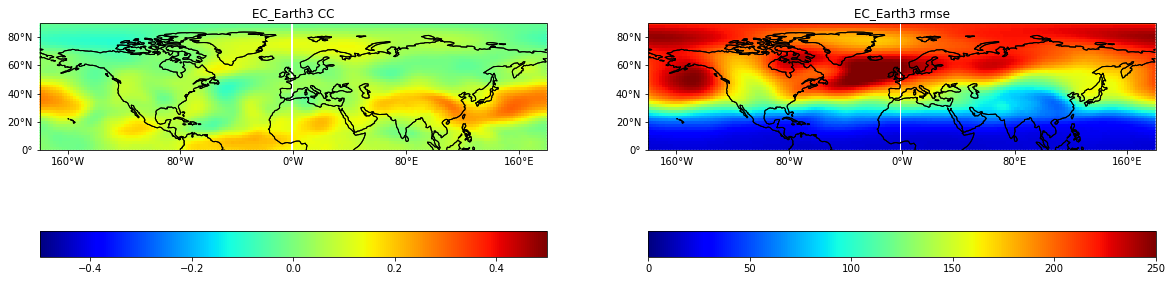

In [38]:
zLevData = xr.open_dataset('../../Data/CMIP6/EC-Earth3/processed/Regrid_zg_day_EC-Earth3_historical_r1i1p1f1_gr_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
EC_Earth3=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
EC_Earth3
r = xs.pearson_r(era5, EC_Earth3, dim='time')
r
p = xs.pearson_r_p_value(era5, EC_Earth3, dim='time')
#p
r

rm = xs.rmse(era5, EC_Earth3, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('EC_Earth3 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('EC_Earth3 rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


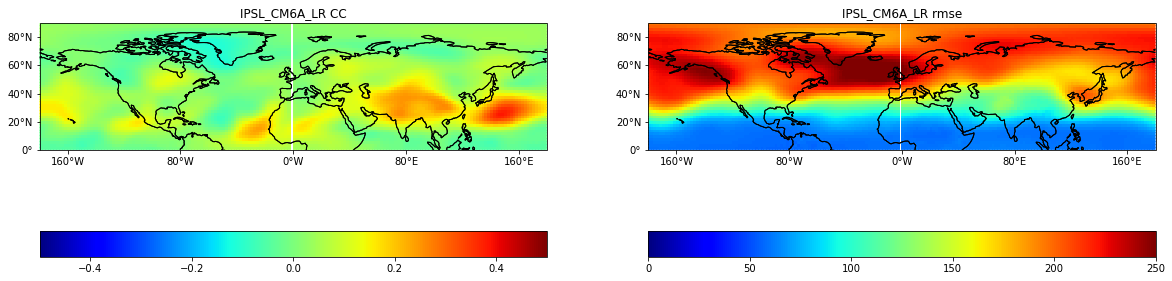

In [39]:
zLevData = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_zg_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
IPSL_CM6A_LR=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
IPSL_CM6A_LR
r = xs.pearson_r(era5, IPSL_CM6A_LR, dim='time')
r
p = xs.pearson_r_p_value(era5, IPSL_CM6A_LR, dim='time')
#p
r

rm = xs.rmse(era5, IPSL_CM6A_LR, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('IPSL_CM6A_LR CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('IPSL_CM6A_LR rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


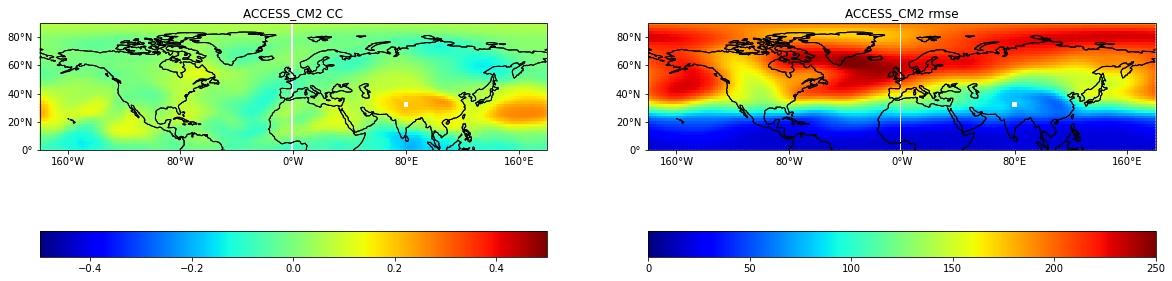

In [40]:
zLevData = xr.open_dataset('../../Data/CMIP6/ACCESS-CM2/zgNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
ACCESS_CM2=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
ACCESS_CM2
r = xs.pearson_r(era5, ACCESS_CM2, dim='time')
r
p = xs.pearson_r_p_value(era5, ACCESS_CM2, dim='time')
#p
r

rm = xs.rmse(era5, ACCESS_CM2, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('ACCESS_CM2 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('ACCESS_CM2 rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


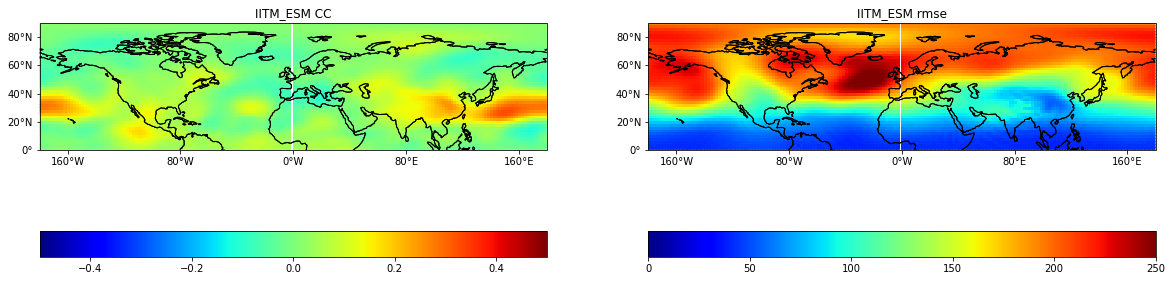

In [41]:
zLevData = xr.open_dataset('../../Data/CMIP6/ESM/historic/zgNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
IITM_ESM=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
IITM_ESM
r = xs.pearson_r(era5, IITM_ESM, dim='time')
r
p = xs.pearson_r_p_value(era5, IITM_ESM, dim='time')
#p
r

rm = xs.rmse(era5, IITM_ESM, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('IITM_ESM CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('IITM_ESM rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


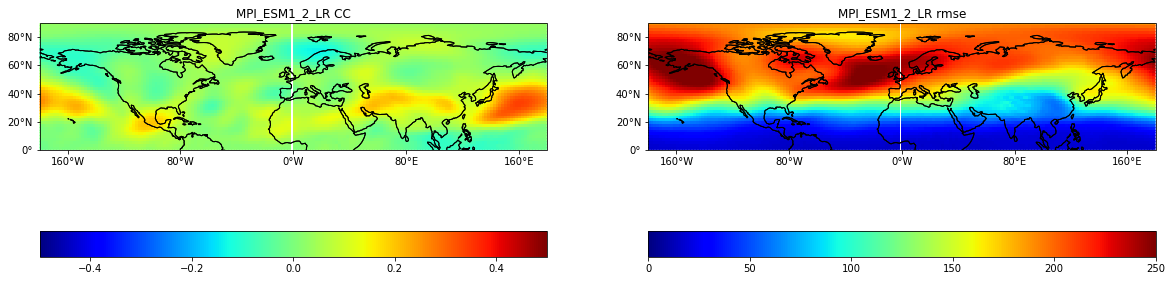

In [42]:
zLevData = xr.open_dataset('../../Data/CMIP6/MPI-ESM1-2-LR/processed/Regrid_zg_day_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
MPI_ESM1_2_LR=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
MPI_ESM1_2_LR
r = xs.pearson_r(era5, MPI_ESM1_2_LR, dim='time')
r
p = xs.pearson_r_p_value(era5, MPI_ESM1_2_LR, dim='time')
#p
r

rm = xs.rmse(era5, MPI_ESM1_2_LR, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('MPI_ESM1_2_LR CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('MPI_ESM1_2_LR rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


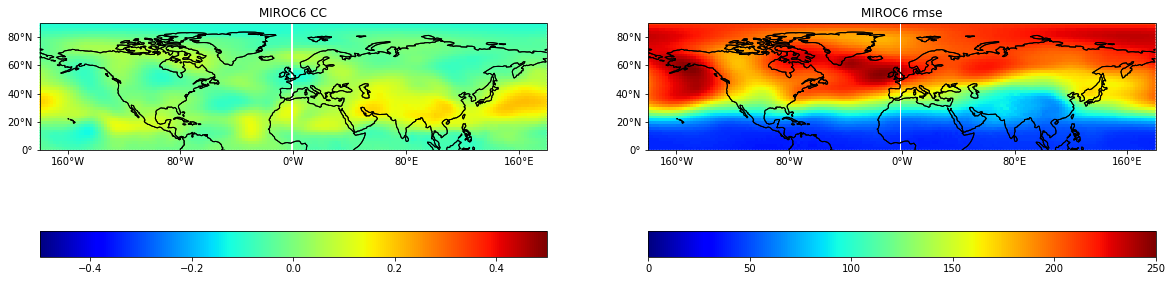

In [43]:
zLevData = xr.open_dataset('../../Data/CMIP6/MIROC6/zgNHRegrid_NDJFday_MIROC6_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
MIROC6=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
MIROC6
r = xs.pearson_r(era5, MIROC6, dim='time')
r
p = xs.pearson_r_p_value(era5, MIROC6, dim='time')
#p
r

rm = xs.rmse(era5, MIROC6, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('MIROC6 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('MIROC6 rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


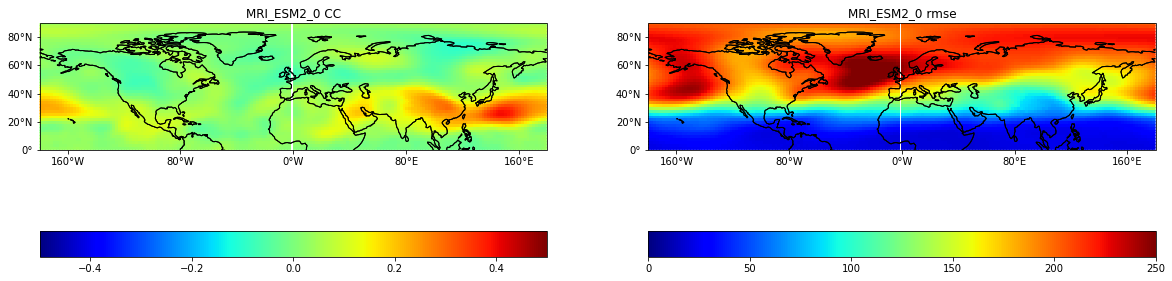

In [44]:
zLevData = xr.open_dataset('../../Data/CMIP6/MRI-ESM2-0/processed/Regrid_zg_day_MRI-ESM2-0_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
MRI_ESM2_0=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
MRI_ESM2_0
r = xs.pearson_r(era5, MRI_ESM2_0, dim='time')
r
p = xs.pearson_r_p_value(era5, MRI_ESM2_0, dim='time')
#p
r

rm = xs.rmse(era5, MRI_ESM2_0, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('MRI_ESM2_0 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('MRI_ESM2_0 rmse')

fig.colorbar(m2,orientation='horizontal')


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


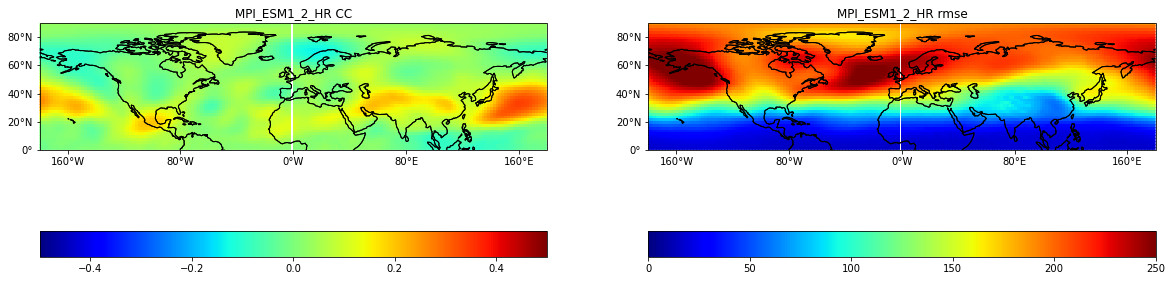

In [46]:
zLevData = xr.open_dataset('../../Data/CMIP6/MPI-ESM1-2-LR/processed/Regrid_zg_day_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg
MPI_ESM1_2_HR=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
MPI_ESM1_2_HR
r = xs.pearson_r(era5, MPI_ESM1_2_HR, dim='time')
r
p = xs.pearson_r_p_value(era5, MPI_ESM1_2_HR, dim='time')
#p
r

rm = xs.rmse(era5, MPI_ESM1_2_HR, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('MPI_ESM1_2_HR CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('MPI_ESM1_2_HR rmse')

fig.colorbar(m2,orientation='horizontal')


<ipython-input-48-014552e0514b>:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = z.indexes['time'].to_datetimeindex()
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


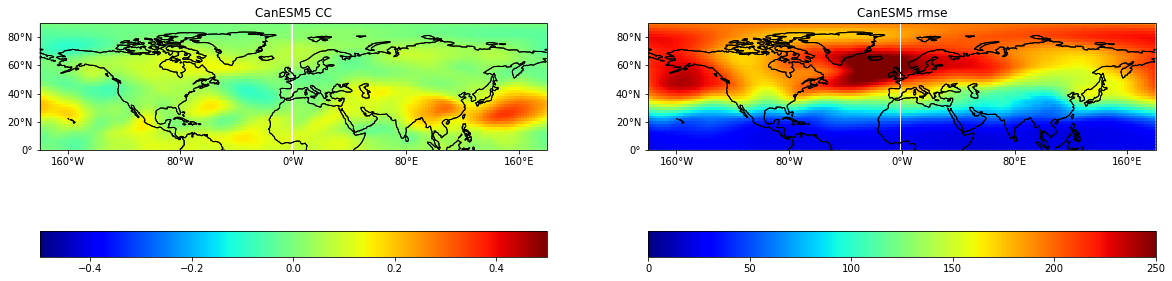

In [48]:
zLevData = xr.open_dataset('../../Data/CMIP6/CANESM5/RegridNHzg_NDJFday_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg

datetimeindex = z.indexes['time'].to_datetimeindex()
datetimeindex
z['time'] = datetimeindex


CanESM5=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
CanESM5


r = xs.pearson_r(era5, CanESM5, dim='time')
r
p = xs.pearson_r_p_value(era5, CanESM5, dim='time')
#p
r

rm = xs.rmse(era5, CanESM5, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('CanESM5 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('CanESM5 rmse')

fig.colorbar(m2,orientation='horizontal')


<ipython-input-49-b625eb86d2f8>:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = z.indexes['time'].to_datetimeindex()
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


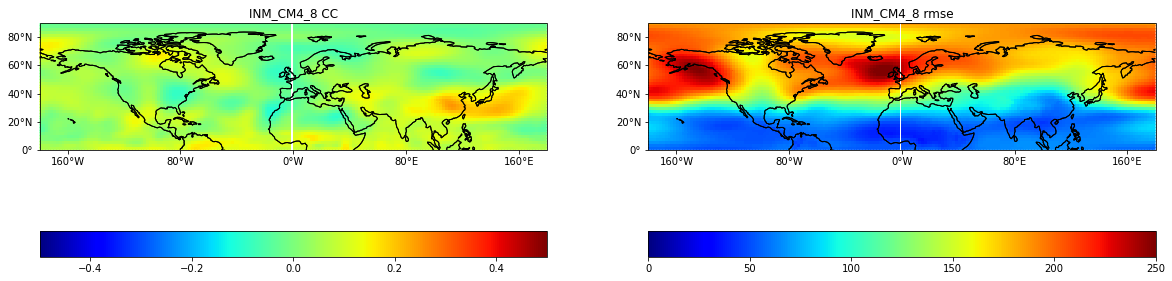

In [49]:
zLevData = xr.open_dataset('../../Data/CMIP6/INM-CM4-8/processed/Regrid_zg_day_INM-CM4-8_historical_r1i1p1f1_gr1_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg

datetimeindex = z.indexes['time'].to_datetimeindex()
datetimeindex
z['time'] = datetimeindex


INM_CM4_8=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
INM_CM4_8


r = xs.pearson_r(era5, INM_CM4_8, dim='time')
r
p = xs.pearson_r_p_value(era5, INM_CM4_8, dim='time')
#p
r

rm = xs.rmse(era5, INM_CM4_8, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('INM_CM4_8 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('INM_CM4_8 rmse')

fig.colorbar(m2,orientation='horizontal')


<ipython-input-50-c184990a95bf>:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = z.indexes['time'].to_datetimeindex()
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


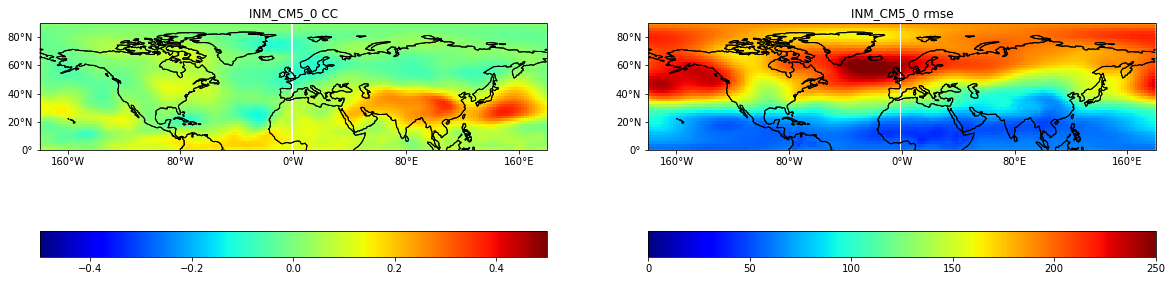

In [50]:
zLevData = xr.open_dataset('../../Data/CMIP6/INM-CM5-0/processed/Regrid_zg_day_INM-CM5-0_historical_r1i1p1f1_gr1_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg

datetimeindex = z.indexes['time'].to_datetimeindex()
datetimeindex
z['time'] = datetimeindex


INM_CM5_0=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
INM_CM5_0


r = xs.pearson_r(era5, INM_CM5_0, dim='time')
r
p = xs.pearson_r_p_value(era5, INM_CM5_0, dim='time')
#p
r

rm = xs.rmse(era5, INM_CM5_0, dim='time')
rm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('INM_CM5_0 CC')
fig.colorbar(m1,orientation='horizontal')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())

m2=ax2.pcolor(rm.longitude.values,rm.latitude.values,rm,transform=ccrs.PlateCarree(),cmap='jet',vmax=250,vmin=0)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax2)
ax2.coastlines()
ax2.set_title('INM_CM5_0 rmse')

fig.colorbar(m2,orientation='horizontal')
